In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir = 'data_set_2'
data_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data_gen = data_gen.flow_from_directory(directory=data_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              shuffle=True,
                                              seed=123,
                                              subset='training')

val_data_gen = data_gen.flow_from_directory(directory=data_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              shuffle=True,
                                              seed=123,
                                              subset='validation')


Found 301 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


In [3]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(train_data_gen.num_classes, activation='softmax'))

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
#train the model
history = model.fit(
    train_data_gen,
    epochs=12,
    validation_data=val_data_gen
)


Epoch 1/12
10/10 [==============================] - 22s 2s/step - loss: 3.7817 - accuracy: 0.5216 - val_loss: 0.4275 - val_accuracy: 0.9467
Epoch 2/12
10/10 [==============================] - 19s 2s/step - loss: 0.3853 - accuracy: 0.7143 - val_loss: 0.4116 - val_accuracy: 0.9733
Epoch 3/12
10/10 [==============================] - 19s 2s/step - loss: 0.3901 - accuracy: 0.9070 - val_loss: 0.3725 - val_accuracy: 0.9333
Epoch 4/12
10/10 [==============================] - 19s 2s/step - loss: 0.3676 - accuracy: 0.9336 - val_loss: 0.3882 - val_accuracy: 0.9733
Epoch 5/12
10/10 [==============================] - 21s 2s/step - loss: 0.3450 - accuracy: 0.9568 - val_loss: 0.5189 - val_accuracy: 0.8533
Epoch 6/12
10/10 [==============================] - 21s 2s/step - loss: 0.3744 - accuracy: 0.9203 - val_loss: 0.3516 - val_accuracy: 0.9733
Epoch 7/12
10/10 [==============================] - 20s 2s/step - loss: 0.3370 - accuracy: 0.9601 - val_loss: 0.3418 - val_accuracy: 0.9733
Epoch 8/12
10/10 [==

In [6]:
#evaluate the model
test_loss, test_acc = model.evaluate(val_data_gen)
print('Test accuracy:', test_acc)


3/3 [==============================] - 2s 507ms/step - loss: 0.2684 - accuracy: 0.9733
Test accuracy: 0.9733333587646484


In [7]:
# make predictions
predictions = model.predict(val_data_gen)


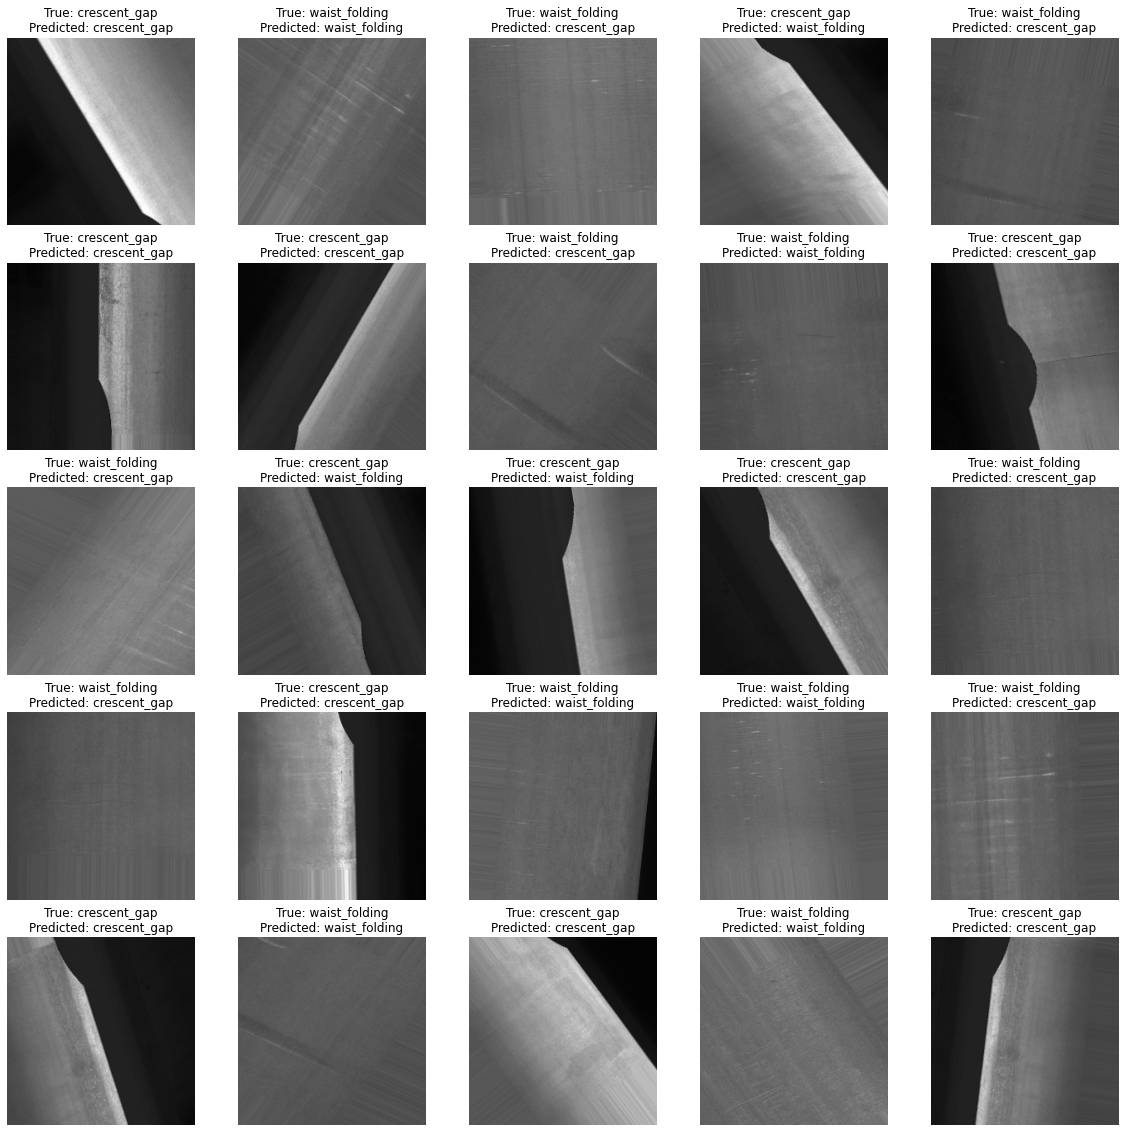

Total wrong predictions: 10


In [8]:
class_labels = val_data_gen.class_indices
class_labels = {v: k for k, v in class_labels.items()}
predictions = model.predict(val_data_gen)
predicted_classes = np.argmax(predictions, axis=-1)
fig = plt.figure(figsize=(20, 20))
wrong_prediction = 0
for i, image in enumerate(val_data_gen):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(image[0][0])
    ax.axis('off')
    ax.set_title(f"True: {class_labels[np.argmax(image[1])]}\nPredicted: {class_labels[predicted_classes[i]]}")
    if class_labels[np.argmax(image[1])]!=class_labels[predicted_classes[i]]:
        wrong_prediction += 1
    if i == 24:
        break
plt.show()
print(f"Total wrong predictions: {wrong_prediction}")
